# CS584 Machine Learning Project 

---

## Introduction



Dataset : [Job Placement Dataset](https://www.kaggle.com/datasets/ahsan81/job-placement-dataset)



Objective : classify whether someone will be employed in the company or not

Problem statement : A company wants to recruit workers with good quality human resources, but the company has difficulty assessing applicants who have good quality, so a classification model is created to determine whether applicants deserve to be in this company or not.


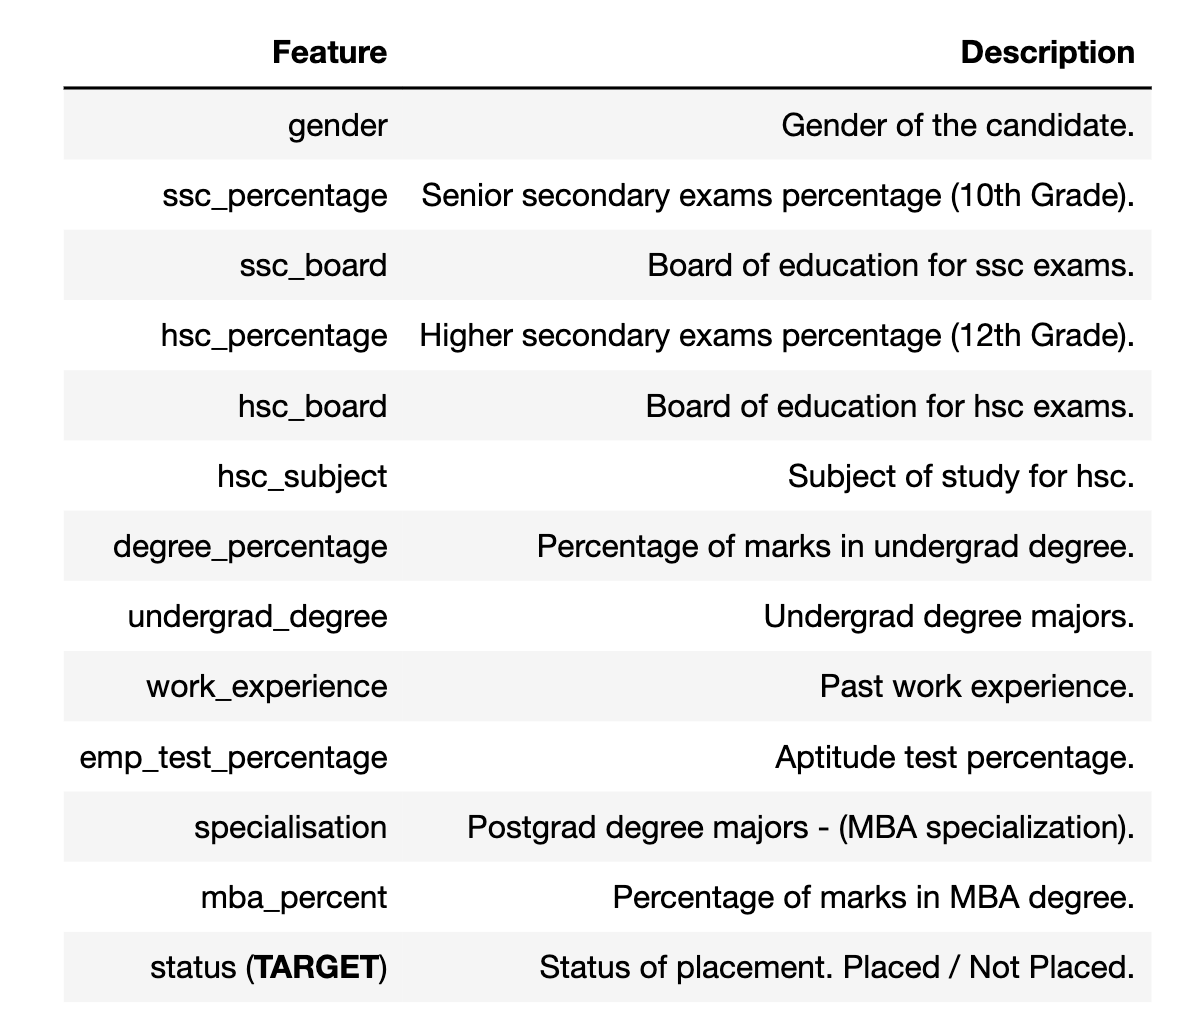


## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split_test_train
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, roc_curve, roc_auc_score, mean_absolute_error
from feature_engine.outliers import Winsorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import pickle


## Data Loading

In [2]:
data = pd.read_csv('/Users/vinodkrishnaselpol/Downloads/Job-Placement-Prediction-main/Job_Placement_Data.csv')

In [3]:
data.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
data.shape

(215, 13)

In [5]:
data.tail()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
210,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed
214,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


This dataset has 13 columns with 2 data types, namely:
- 5 columns with data type float
- 8 columns with object data type
- It does not have any null data


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ssc_percentage,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_percentage,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_percentage,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
emp_test_percentage,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_percent,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89


from the information above it can be seen that the average, minimum value, maximum value, quartile 1, median, quartile 3, it can also be seen that there may be a few outliers in these 5 numeric columns. These can be useful in understanding the distribution and range of values in the dataFrame. 

### Missing Value Check

In [8]:
data.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

in this dataset there is no missing value

### Data Duplicate

In [9]:
data.duplicated().sum()

0

in this dataset there are no duplicate data

## Exploratory Data Analysis (EDA)

 The goal of EDA is to gain insights into the data, understand its structure, identify patterns and relationships,
 and detect any anomalies or outliers that may require further investigation. EDA is often used as a first step in 
 the data analysis process, before applying more advanced statistical or machine learning techniques.

### Status

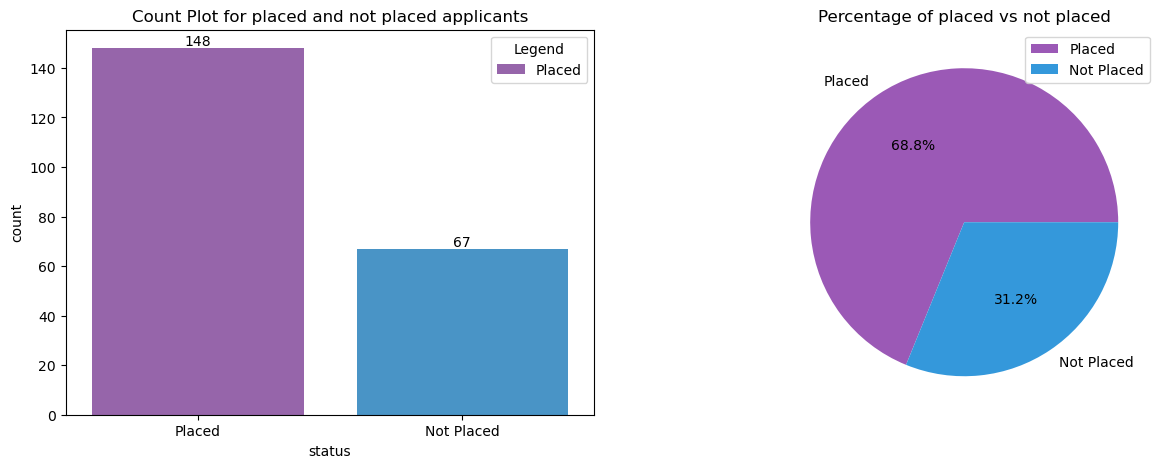

In [10]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# colors = ["#9b59b6", "#3498db"]
# ax = sns.countplot(x='status', data = data, palette=colors, label='Count Plot for Placed & not placed Applicants')
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")


# plt.subplot(1,2,2)
# plt.pie(data.status.value_counts(), labels= data.status.value_counts().index, autopct = '%1.1f%%', colors=['#9b59b6', '#3498db'], )
# plt.legend()
# plt.show()

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

colors = ["#9b59b6", "#3498db"]

sns.countplot(x='status', data=data, palette=colors, ax=axs[0])
axs[0].set_title('Count Plot for placed and not placed applicants')
axs[0].legend(title='Legend', labels=['Placed', 'Not Placed'])

for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width()/2., height + 1, '{:1.0f}'.format(height), ha="center")

axs[1].pie(data.status.value_counts(), labels=data.status.value_counts().index, autopct='%1.1f%%', colors=colors)
axs[1].set_title('Percentage of placed vs not placed')
axs[1].legend()

plt.show()


This status or target column has 2 values, namely placed and not placed where plcaed has a total of 148 or 69% data and not placed has a total of 67 or 31% data. It can be concluded that the percentage comparison of these two values has a large difference or it can be said to be imbalance data.

### Gender

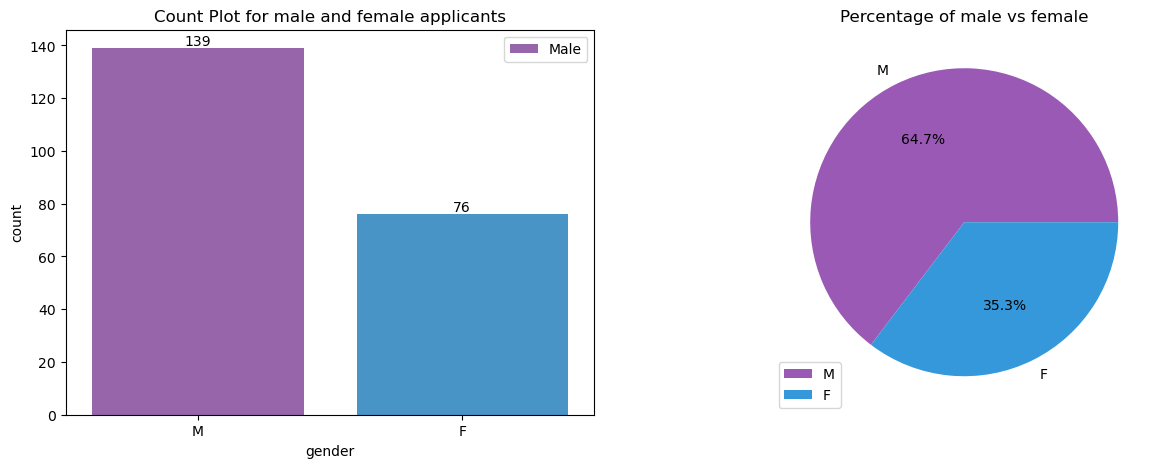

In [11]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# ax = sns.countplot(x='gender', data = data)
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

# plt.subplot(1,2,2)
# plt.pie(data.gender.value_counts(), labels= data.gender.value_counts().index, autopct = '%1.1f%%')
# plt.show()

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

colors = ["#9b59b6", "#3498db"]

sns.countplot(x='gender', data=data, palette=colors, ax=axs[0])
axs[0].set_title('Count Plot for male and female applicants')
axs[0].legend( labels=['Male', 'Female'])

for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width()/2., height + 1, '{:1.0f}'.format(height), ha="center")

axs[1].pie(data.gender.value_counts(), labels=data.gender.value_counts().index, autopct='%1.1f%%', colors=colors)
axs[1].set_title('Percentage of male vs female')
axs[1].legend()

plt.show()

in this dataset the male is 139 or 65% and the female is 76 or 35%.

### ssc_percentage

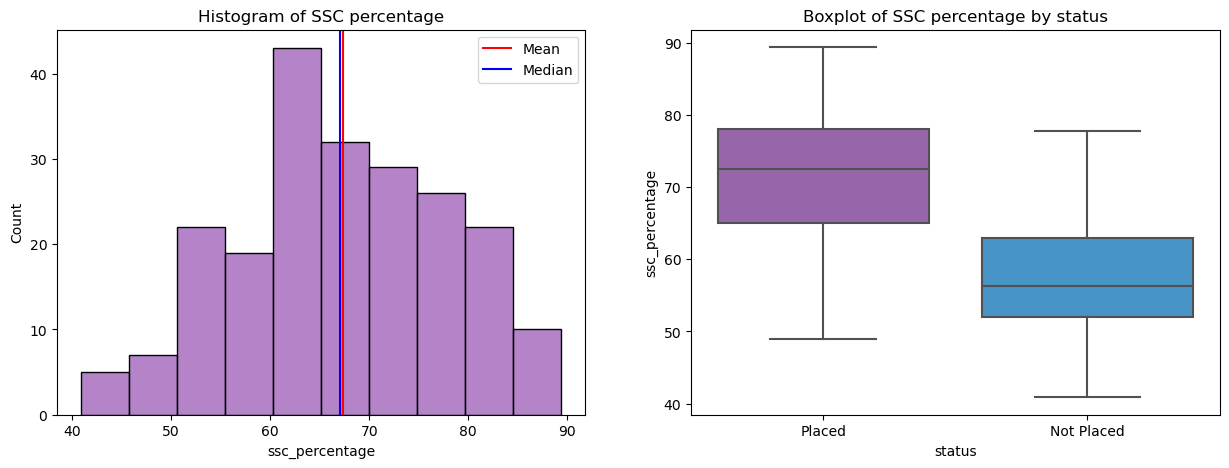

Skewness: -0.13264949031456927
Mean: 67.3033953488372
Median: 67.0


In [12]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.histplot(data.ssc_percentage)
# plt.axvline(data.ssc_percentage.mean(), color='r', label='Mean')
# plt.axvline(data.ssc_percentage.median(), color='g', label='Median')
# plt.legend()

# plt.subplot(1,2,2)
# sns.boxplot(x='status', y='ssc_percentage', data = data)
# plt.show()
# print('Skewness :', data.ssc_percentage.skew())
# print('Mean :', data.ssc_percentage.mean())
# print('Median :', data.ssc_percentage.median())





# Set figure size and create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot histogram and add mean and median lines
sns.histplot(data=data, x='ssc_percentage', ax=ax[0], color='#9b59b6')
ax[0].axvline(data.ssc_percentage.mean(), color='r', label='Mean')
ax[0].axvline(data.ssc_percentage.median(), color='b', label='Median')
ax[0].set(title='Histogram of SSC percentage')
ax[0].legend()

# Plot boxplot and set color palette
sns.boxplot(data=data, x='status', y='ssc_percentage', ax=ax[1], palette=["#9b59b6", "#3498db"])
ax[1].set(title='Boxplot of SSC percentage by status')

# Show the plot
plt.show()

# Print skewness, mean, and median
print('Skewness:', data.ssc_percentage.skew())
print('Mean:', data.ssc_percentage.mean())
print('Median:', data.ssc_percentage.median())



The percentage of scores obtained by a person from the total score of the SSC exam averaged 67.3, from the distribution form the ssc_percentage column is normal because the skewness value is -0.13 or still between -0.5 and 0.5, it can be seen that there is also a correlation between the ssc_percentage column and the status column, where the higher If someone gets an SSC score, it is very likely that the person will be accepted for work.

### ssc_board  

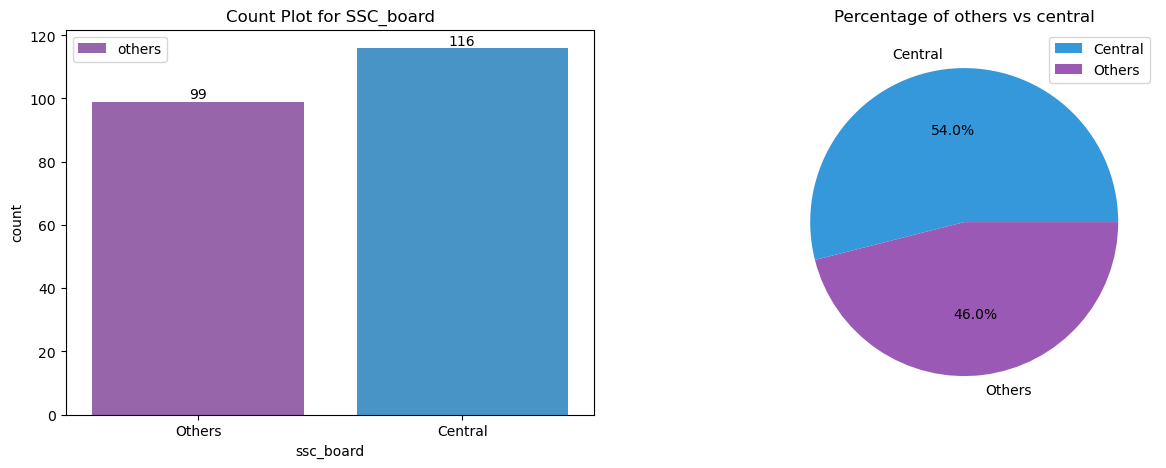

In [13]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# ax = sns.countplot(x='ssc_board', data = data)
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

# plt.subplot(1,2,2)
# plt.pie(data.ssc_board.value_counts(), labels= data.ssc_board.value_counts().index, autopct = '%1.1f%%')
# plt.show()

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

colors = ["#9b59b6", "#3498db"]

sns.countplot(x='ssc_board', data=data, palette=colors, ax=axs[0])
axs[0].set_title('Count Plot for SSC_board')
axs[0].legend( labels=['others'])

for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width()/2., height + 1, '{:1.0f}'.format(height), ha="center")

    
colors1 = [ "#3498db", "#9b59b6",]
axs[1].pie(data.ssc_board.value_counts(), labels=data.ssc_board.value_counts().index, autopct='%1.1f%%', colors=colors1)
axs[1].set_title('Percentage of others vs central')
axs[1].legend()

plt.show()

The management body responsible for administering the SSC exam is others (a combination of several administrators) and central where others have 99 or 46% of data and central as much as 116 or 54%

### hsc_percentage

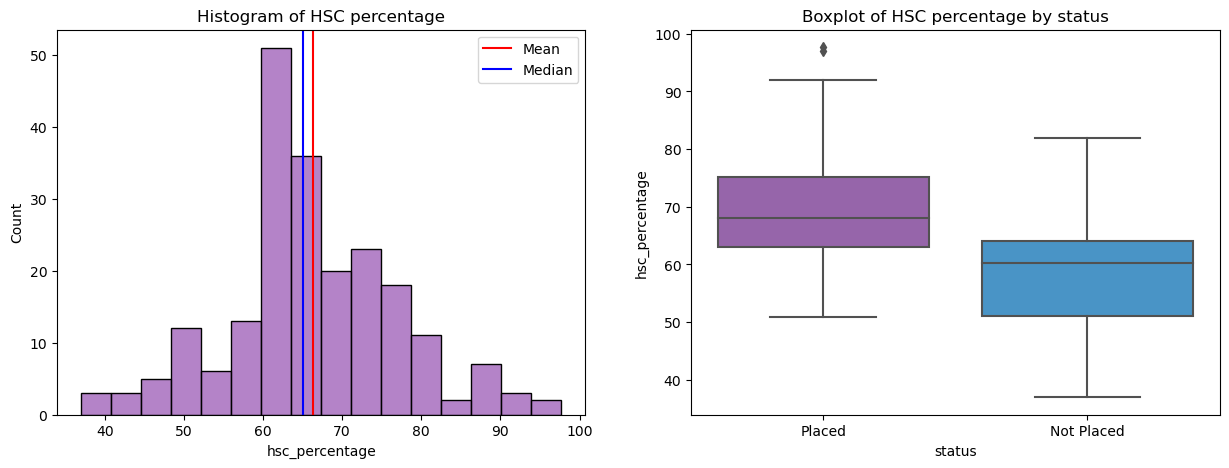

Skewness: 0.16363913146416115
Mean: 66.33316279069766
Median: 65.0


In [14]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.histplot(data.hsc_percentage)
# plt.axvline(data.hsc_percentage.mean(), color='r', label='Mean')
# plt.axvline(data.hsc_percentage.median(), color='g', label='Median')
# plt.legend()

# plt.subplot(1,2,2)
# sns.boxplot(x='status', y='hsc_percentage', data = data)
# plt.show()
# print('Skewness :', data.hsc_percentage.skew())
# print('Mean :', data.hsc_percentage.mean())
# print('Median :', data.hsc_percentage.median())


# Set figure size and create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot histogram and add mean and median lines
sns.histplot(data=data, x='hsc_percentage', ax=ax[0], color='#9b59b6')
ax[0].axvline(data.hsc_percentage.mean(), color='r', label='Mean')
ax[0].axvline(data.hsc_percentage.median(), color='b', label='Median')
ax[0].set(title='Histogram of HSC percentage')
ax[0].legend()

# Plot boxplot and set color palette
sns.boxplot(data=data, x='status', y='hsc_percentage', ax=ax[1], palette=["#9b59b6", "#3498db"])
ax[1].set(title='Boxplot of HSC percentage by status')

# Show the plot
plt.show()

# Print skewness, mean, and median
print('Skewness:', data.hsc_percentage.skew())
print('Mean:', data.hsc_percentage.mean())
print('Median:', data.hsc_percentage.median())




The percentage of scores obtained by a person from the total score of the HSC exam averages 66.3, from the shape of the distribution of the hsc_percentage column this is normal because the skewness value is 0.16 or still between -0.5 and 0.5, it can also be seen that there is a correlation between the hsc_percentage column and the status column, where the taller a person get an HSC score, it is likely that the person will be accepted to work.

### hsc_board

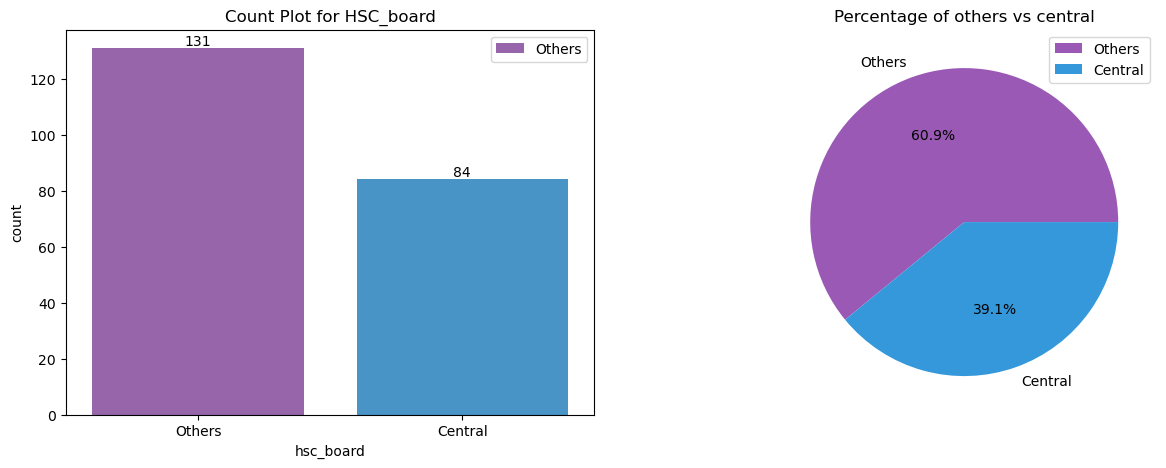

In [15]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# ax = sns.countplot(x='hsc_board', data = data)
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

# plt.subplot(1,2,2)
# plt.pie(data.hsc_board.value_counts(), labels= data.hsc_board.value_counts().index, autopct = '%1.1f%%')
# plt.show()


fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

colors = ["#9b59b6", "#3498db"]

sns.countplot(x='hsc_board', data=data, palette=colors, ax=axs[0])
axs[0].set_title('Count Plot for HSC_board')
axs[0].legend( labels=['Others', 'Central'])

for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width()/2., height + 1, '{:1.0f}'.format(height), ha="center")

axs[1].pie(data.hsc_board.value_counts(), labels=data.hsc_board.value_counts().index, autopct='%1.1f%%', colors=colors)
axs[1].set_title('Percentage of others vs central')
axs[1].legend()

plt.show()

The management body responsible for administering the HSC exam is others (a combination of several administrators) and central where others have 131 or 61% of data and central as much as 84 or 39%

### hsc_subject

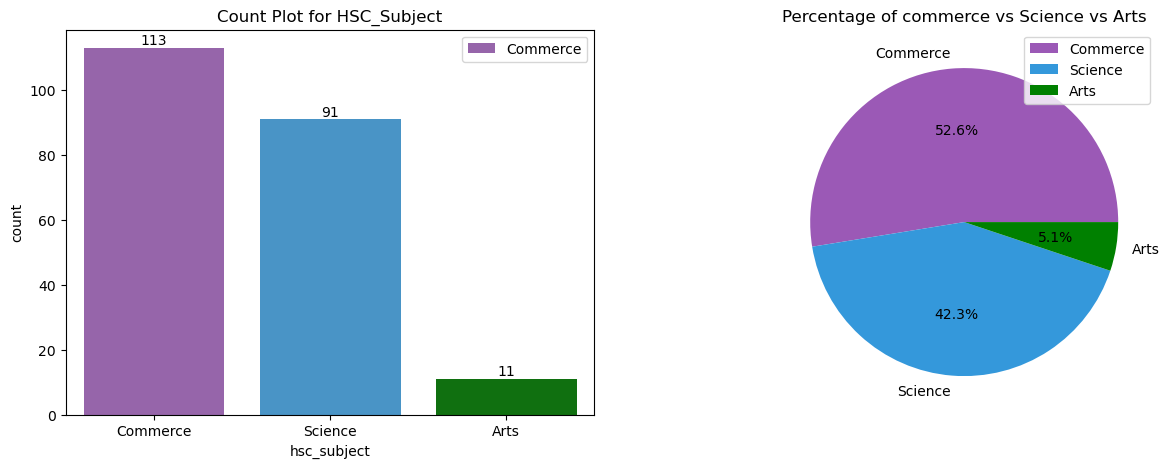

In [16]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# ax = sns.countplot(x='hsc_subject', data = data)
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

# plt.subplot(1,2,2)
# plt.pie(data.hsc_subject.value_counts(), labels= data.hsc_subject.value_counts().index, autopct = '%1.1f%%')
# plt.show()

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

colors = ["#9b59b6", "#3498db", "green"]

sns.countplot(x='hsc_subject', data=data, palette=colors, ax=axs[0])
axs[0].set_title('Count Plot for HSC_Subject')
axs[0].legend( labels=['Commerce', 'Science', 'Arts'])

for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width()/2., height + 1, '{:1.0f}'.format(height), ha="center")

axs[1].pie(data.hsc_subject.value_counts(), labels=data.hsc_subject.value_counts().index, autopct='%1.1f%%', colors=colors)
axs[1].set_title('Percentage of commerce vs Science vs Arts')
axs[1].legend()

plt.show()


There are 3 subjects tested in the HSC exam, namely Commerce, Science and Arts where Commerce has the highest number with a lot of data 113 or 53%, Science with 91 or 42% data and Arts has 11 or 5% data

### degree_percentage

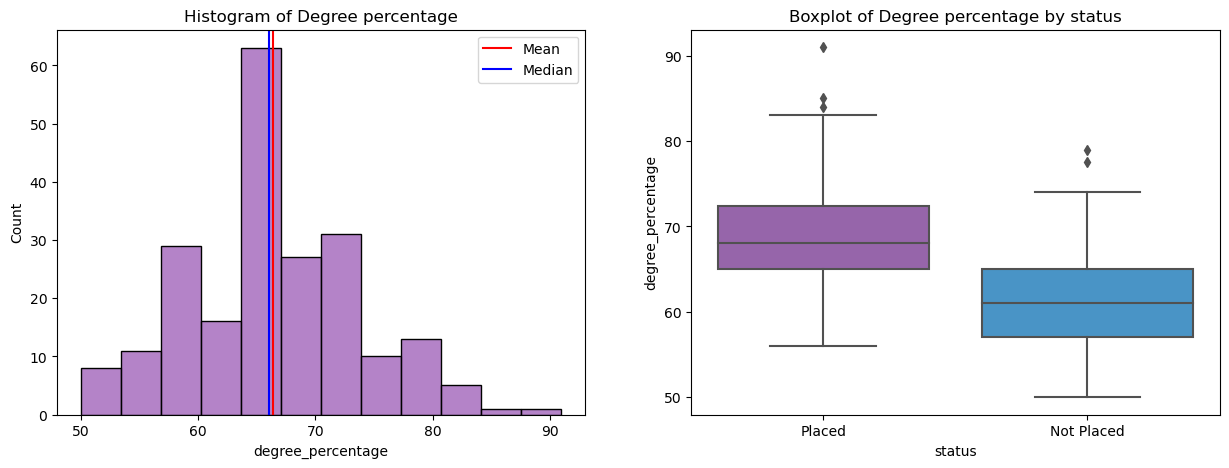

Skewness: 0.24491716177925815
Mean: 66.37018604651163
Median: 66.0


In [17]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.histplot(data.degree_percentage)
# plt.axvline(data.degree_percentage.mean(), color='r', label='Mean')
# plt.axvline(data.degree_percentage.median(), color='g', label='Median')
# plt.legend()

# plt.subplot(1,2,2)
# sns.boxplot(x='status', y='degree_percentage', data = data)
# plt.show()
# print('Skewness :', data.degree_percentage.skew())
# print('Mean :', data.degree_percentage.mean())
# print('Median :', data.degree_percentage.median())


# Set figure size and create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot histogram and add mean and median lines
sns.histplot(data=data, x='degree_percentage', ax=ax[0], color='#9b59b6')
ax[0].axvline(data.degree_percentage.mean(), color='r', label='Mean')
ax[0].axvline(data.degree_percentage.median(), color='b', label='Median')
ax[0].set(title='Histogram of Degree percentage')
ax[0].legend()

# Plot boxplot and set color palette
sns.boxplot(data=data, x='status', y='degree_percentage', ax=ax[1], palette=["#9b59b6", "#3498db"])
ax[1].set(title='Boxplot of Degree percentage by status')

# Show the plot
plt.show()

# Print skewness, mean, and median
print('Skewness:', data.degree_percentage.skew())
print('Mean:', data.degree_percentage.mean())
print('Median:', data.degree_percentage.median())




The value obtained by a person from the total value of an undergraduate or tertiary program averages 66.3, the shape of the distribution of the degree_percentage column is normal because the skewness value is 0.24 or still between -0.5 and 0.5, it can be seen that there is also a correlation between the degree_percentage column and the status column, where the higher a person gets a score, the more likely that person is accepted to work.

### undergrad_degree

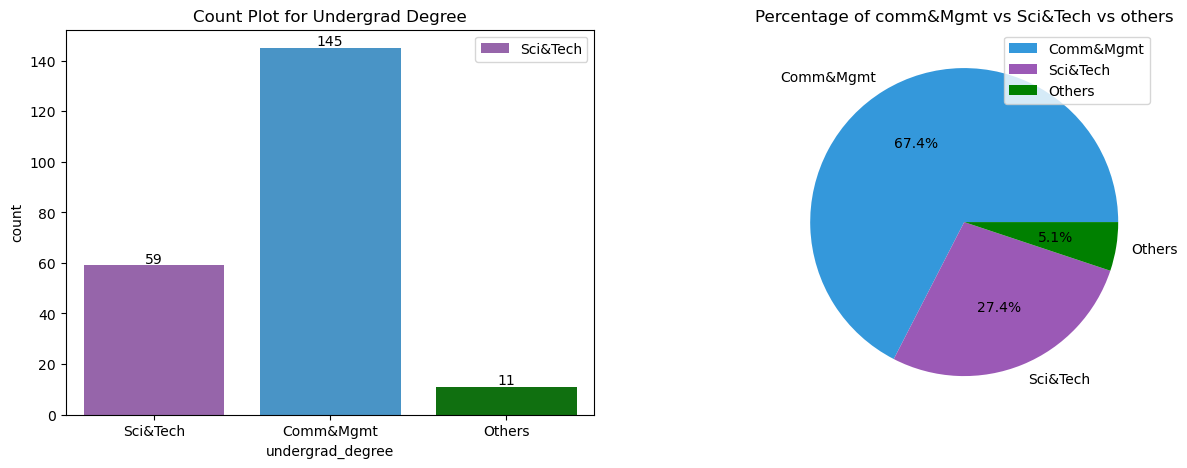

In [18]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# ax = sns.countplot(x='undergrad_degree', data = data)
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

# plt.subplot(1,2,2)
# plt.pie(data.undergrad_degree.value_counts(), labels= data.undergrad_degree.value_counts().index, autopct = '%1.1f%%')
# plt.show()


fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

colors = ["#9b59b6", "#3498db", "green"]

sns.countplot(x='undergrad_degree', data=data, palette=colors, ax=axs[0])
axs[0].set_title('Count Plot for Undergrad Degree')
axs[0].legend( labels=['Sci&Tech', 'Comm&Mgmt', 'others'])

for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width()/2., height + 1, '{:1.0f}'.format(height), ha="center")
colors1 = [ "#3498db","#9b59b6","green"]
axs[1].pie(data.undergrad_degree.value_counts(), labels=data.undergrad_degree.value_counts().index, autopct='%1.1f%%', colors=colors1)
axs[1].set_title('Percentage of comm&Mgmt vs Sci&Tech vs others')
axs[1].legend()

plt.show()

Most undergraduate degrees are comm&mgmt or communication and management with 145 or 67.4% data, Sci&Tech or Science and Technology with 59 or 27.4% data and from other degrees as many as 11 or 5%

### work_experience

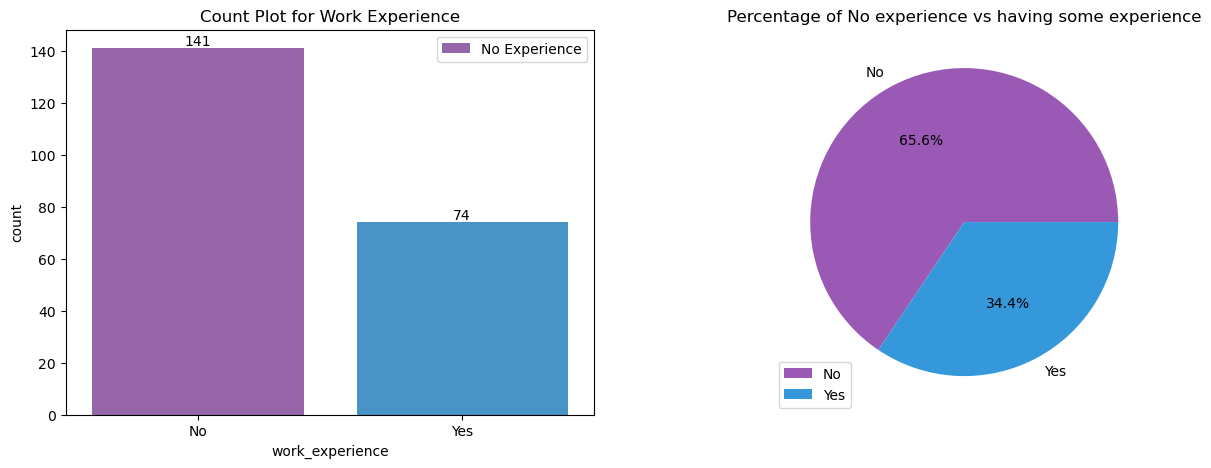

In [19]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# ax = sns.countplot(x='work_experience', data = data)
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

# plt.subplot(1,2,2)
# plt.pie(data.work_experience.value_counts(), labels= data.work_experience.value_counts().index, autopct = '%1.1f%%')
# plt.show()


fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

colors = ["#9b59b6", "#3498db"]

sns.countplot(x='work_experience', data=data, palette=colors, ax=axs[0])
axs[0].set_title('Count Plot for Work Experience')
axs[0].legend( labels=['No Experience', 'Have some experience'])

for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width()/2., height + 1, '{:1.0f}'.format(height), ha="center")

axs[1].pie(data.work_experience.value_counts(), labels=data.work_experience.value_counts().index, autopct='%1.1f%%', colors=colors)
axs[1].set_title('Percentage of No experience vs having some experience')
axs[1].legend()

plt.show()

From the plot above it can be seen that most people do not have work experience, there are as many as 141 people or 66% do not have work experience, and as many as 74 people or 34% already have work experience

### emp_test_percentage

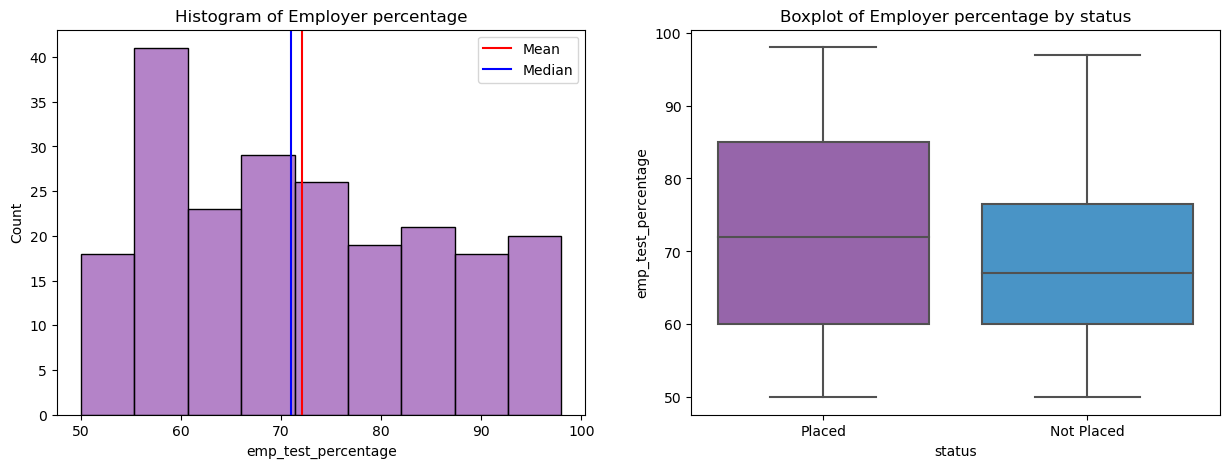

Skewness: 0.28230815846982243
Mean: 72.10055813953488
Median: 71.0


In [20]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.histplot(data.emp_test_percentage)
# plt.axvline(data.emp_test_percentage.mean(), color='r', label='Mean')
# plt.axvline(data.emp_test_percentage.median(), color='g', label='Median')
# plt.legend()

# plt.subplot(1,2,2)
# sns.boxplot(x='status', y='emp_test_percentage', data = data)
# plt.show()
# print('Skewness :', data.emp_test_percentage.skew())
# print('Mean :', data.emp_test_percentage.mean())
# print('Median :', data.emp_test_percentage.median())


# Set figure size and create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot histogram and add mean and median lines
sns.histplot(data=data, x='emp_test_percentage', ax=ax[0], color='#9b59b6')
ax[0].axvline(data.emp_test_percentage.mean(), color='r', label='Mean')
ax[0].axvline(data.emp_test_percentage.median(), color='b', label='Median')
ax[0].set(title='Histogram of Employer percentage')
ax[0].legend()

# Plot boxplot and set color palette
sns.boxplot(data=data, x='status', y='emp_test_percentage', ax=ax[1], palette=["#9b59b6", "#3498db"])
ax[1].set(title='Boxplot of Employer percentage by status')

# Show the plot
plt.show()

# Print skewness, mean, and median
print('Skewness:', data.emp_test_percentage.skew())
print('Mean:', data.emp_test_percentage.mean())
print('Median:', data.emp_test_percentage.median())




The value obtained by a person from the average aptitude test results is 72, the shape of the distribution of the emp_test_percentage column is normal because the skewness value is 0.28 or still between -0.5 and 0.5, there is also no correlation between the emp_test_percentage column and the status column.

### specialisation

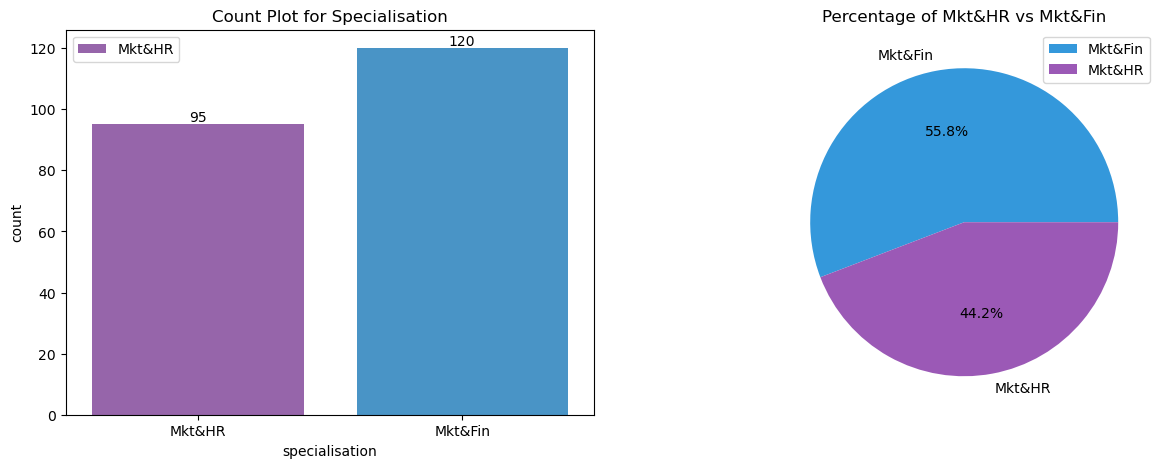

In [21]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# ax = sns.countplot(x='specialisation', data = data)
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

# plt.subplot(1,2,2)
# plt.pie(data.specialisation.value_counts(), labels= data.specialisation.value_counts().index, autopct = '%1.1f%%')
# plt.show()



fig, axs = plt.subplots(ncols=2, figsize=(15, 5))



sns.countplot(x='specialisation', data=data, palette=colors, ax=axs[0])
axs[0].set_title('Count Plot for Specialisation')
axs[0].legend( labels=['Mkt&HR', 'Mkt&Fin'])

for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width()/2., height + 1, '{:1.0f}'.format(height), ha="center")

    
colors1 = [ "#3498db", "#9b59b6"]
axs[1].pie(data.specialisation.value_counts(), labels=data.specialisation.value_counts().index, autopct='%1.1f%%', colors=colors1)
axs[1].set_title('Percentage of Mkt&HR vs Mkt&Fin')
axs[1].legend()

plt.show()

Of specialization, the most numerous is Mkt&Fin or marketing and finance which has 120 or 56% data and for Mkt&HR or marketing and Human Resources has 95 or 44% data

### mba_percent

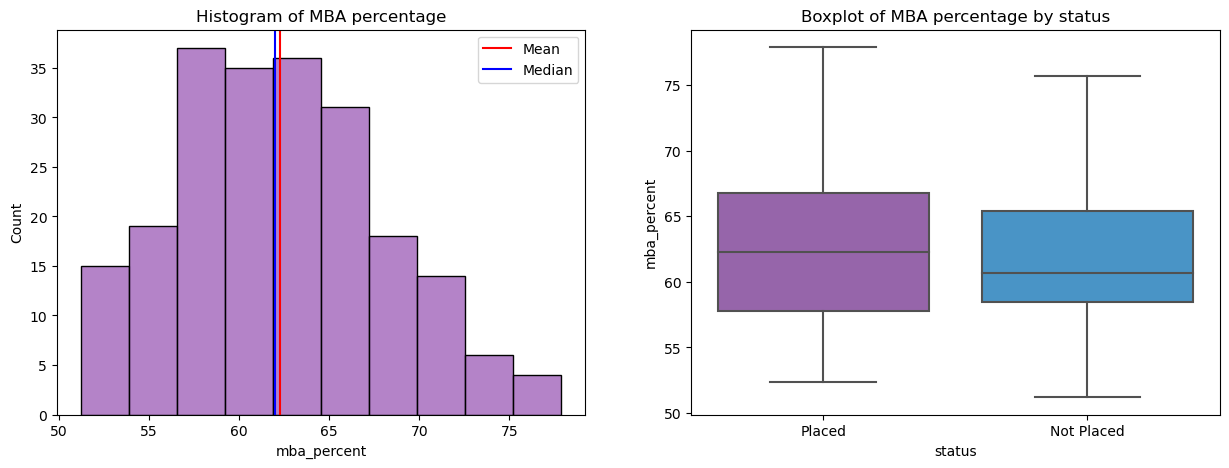

Skewness: 0.31357565317840763
Mean: 62.278186046511586
Median: 62.0


In [22]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.histplot(data.mba_percent)
# plt.axvline(data.mba_percent.mean(), color='r', label='Mean')
# plt.axvline(data.mba_percent.median(), color='g', label='Median')
# plt.legend()

# plt.subplot(1,2,2)
# sns.boxplot(x='status', y='mba_percent', data = data)
# plt.show()
# print('Skewness :', data.mba_percent.skew())
# print('Mean :', data.mba_percent.mean())
# print('Median :', data.mba_percent.median())



# Set figure size and create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot histogram and add mean and median lines
sns.histplot(data=data, x='mba_percent', ax=ax[0], color='#9b59b6')
ax[0].axvline(data.mba_percent.mean(), color='r', label='Mean')
ax[0].axvline(data.mba_percent.median(), color='b', label='Median')
ax[0].set(title='Histogram of MBA percentage')
ax[0].legend()

# Plot boxplot and set color palette
sns.boxplot(data=data, x='status', y='mba_percent', ax=ax[1], palette=["#9b59b6", "#3498db"])
ax[1].set(title='Boxplot of MBA percentage by status')

# Show the plot
plt.show()

# Print skewness, mean, and median
print('Skewness:', data.mba_percent.skew())
print('Mean:', data.mba_percent.mean())
print('Median:', data.mba_percent.median())

The value obtained by a person from the total score in the postgraduate program averages 62, the shape of the distribution of the mba_percent column is normal because the skewness value is 0.31 or still between -0.5 and 0.5, there is also no correlation between the mba_percent column and the status column.

### Correlation Matrix

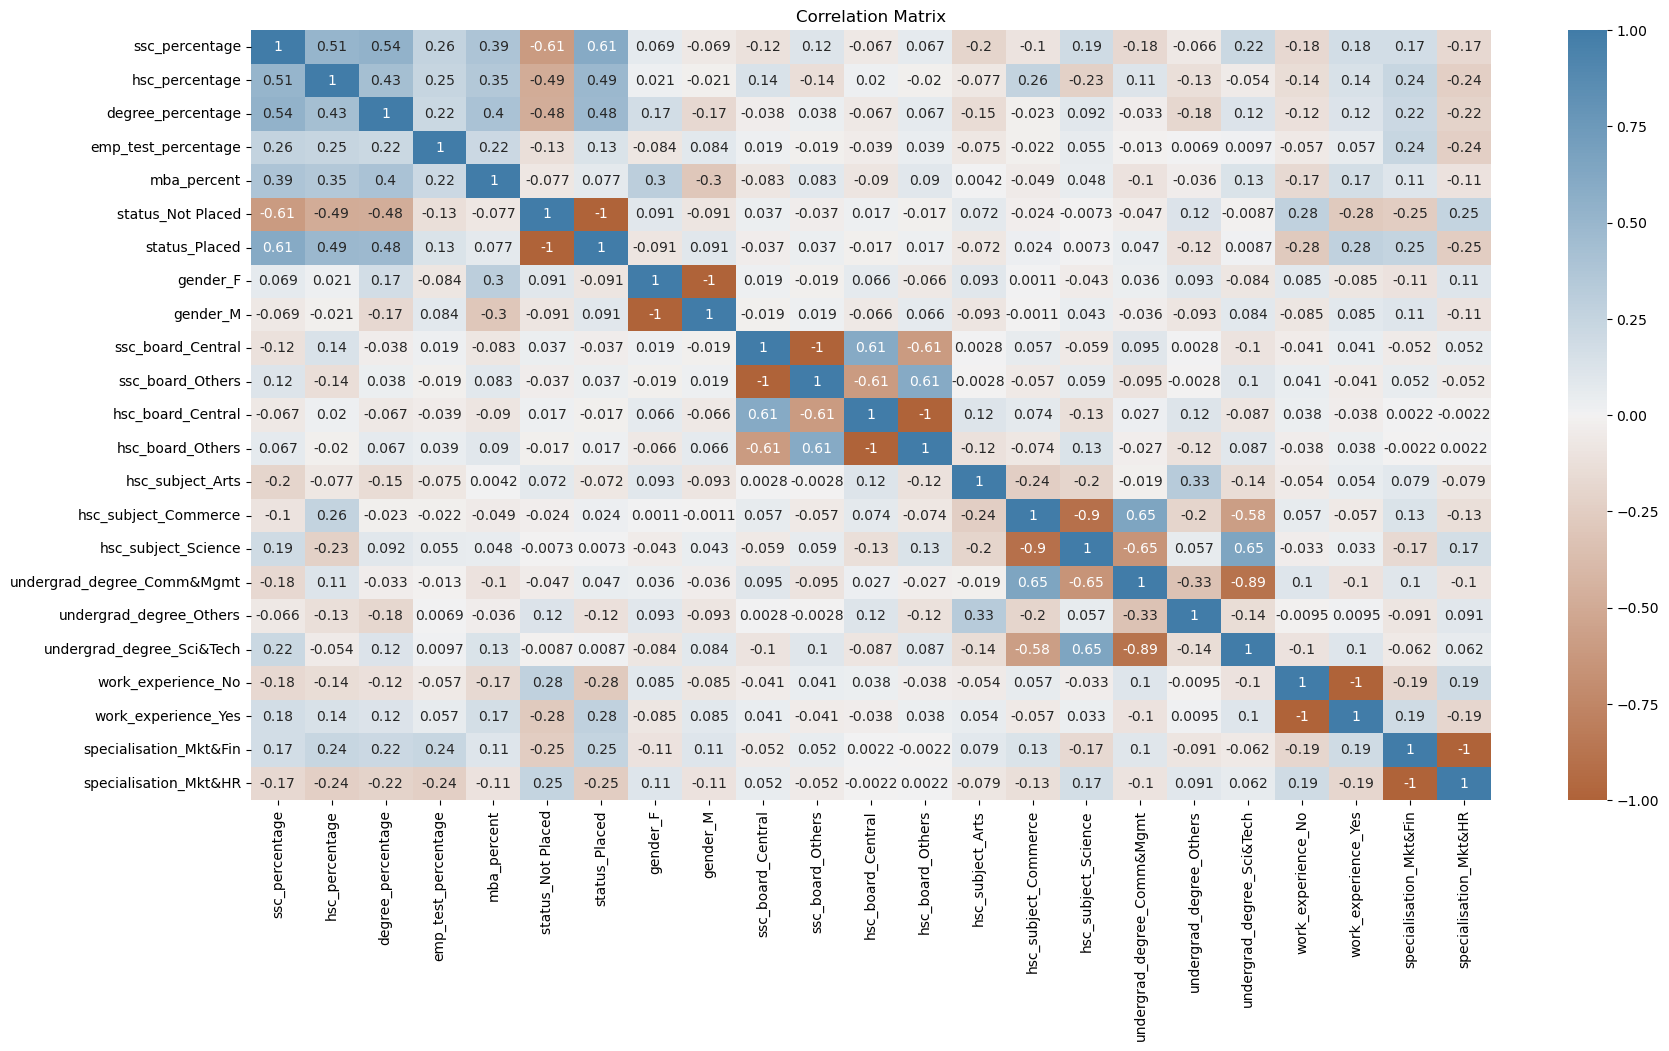

In [23]:
# corr = pd.concat([data[['ssc_percentage','hsc_percentage','degree_percentage','emp_test_percentage','mba_percent']], \
#                  pd.get_dummies(data[['status','gender','ssc_board','hsc_board','hsc_subject','undergrad_degree','work_experience','specialisation']])], axis=1).corr()
# plt.figure(figsize=(20, 10))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()







# Create correlation matrix
corr_matrix = data[['ssc_percentage','hsc_percentage','degree_percentage','emp_test_percentage','mba_percent']] \
                .join(pd.get_dummies(data[['status','gender','ssc_board','hsc_board','hsc_subject','undergrad_degree','work_experience','specialisation']])) \
                .corr()

# Set figure size and create heatmap
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(corr_matrix, cmap=sns.diverging_palette(30, 240, as_cmap=True), annot=True, vmin=-1, vmax=1)

# Set title
heatmap.set_title('Correlation Matrix')

# Show the plot
plt.show()


From the correlation matrix it can be seen that the target column has a correlation with the `ssc_percentage`, `hsc_percentage`, `degree_percentage`, `work_experience` and `specialization` columns, these columns will be used as features

## Data Preprocessing

### Split Data

In this section, data separation is carried out between train data and test data with a ratio of 70% for train data and 30% for test data.

In [32]:
df_train, df_test = split_test_train(data, test_size=0.3, random_state=27, stratify=data.status)

### Missing Value

In [33]:
df_train.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [34]:
df_test.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

This dataset has no missing values

### Outliers

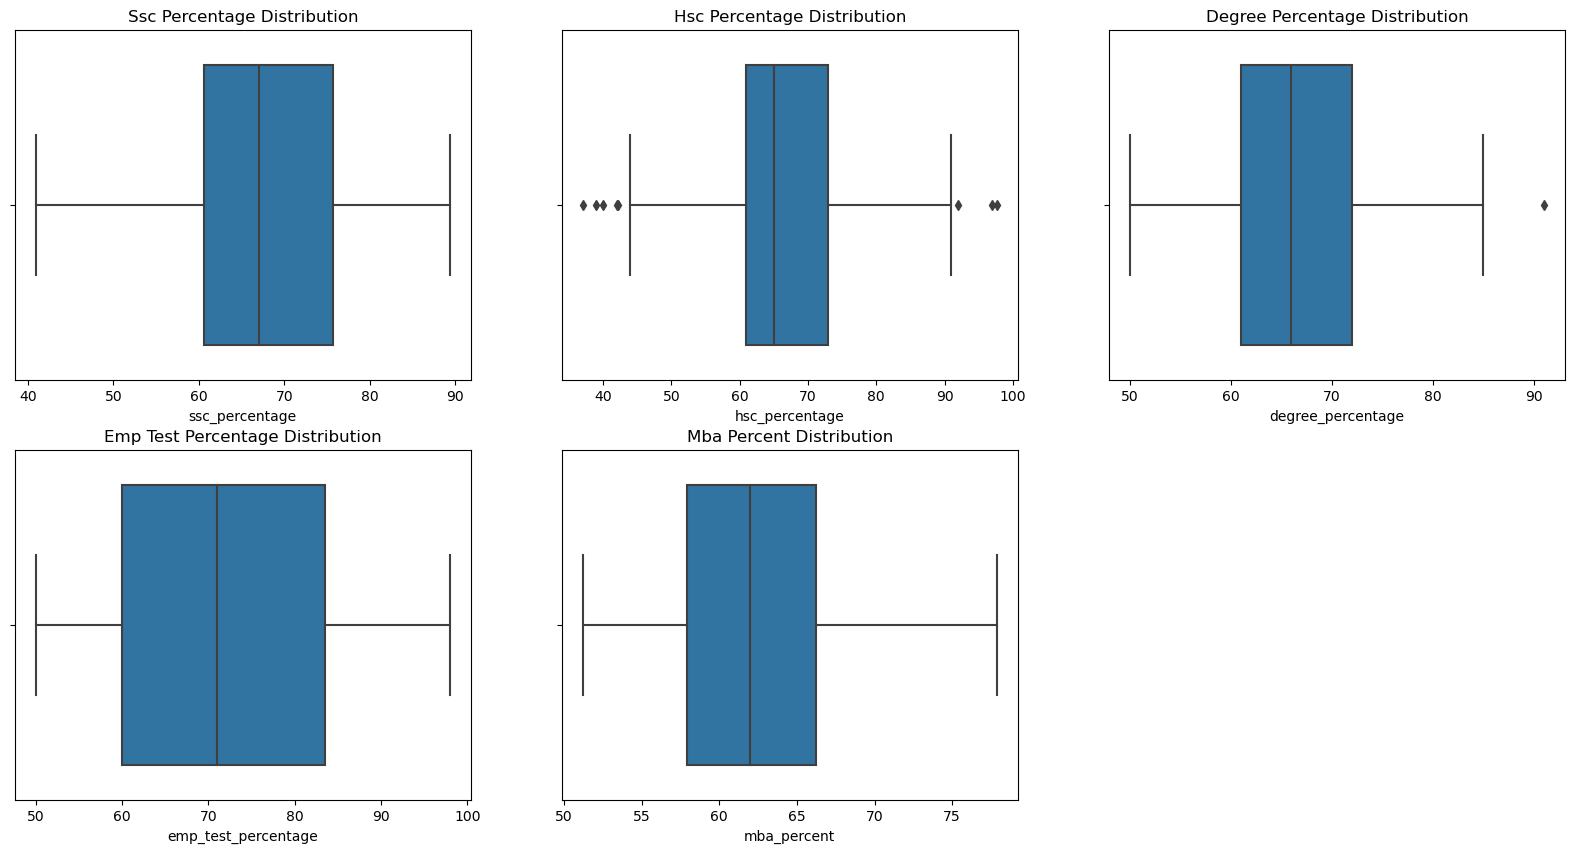

In [35]:
col_out = data[['ssc_percentage','hsc_percentage','degree_percentage', 'emp_test_percentage','mba_percent']]
plt.figure(figsize=(20, 10))
for col in col_out:
    plt.subplot(2, 3, col_out.columns.get_loc(col) + 1)
    sns.boxplot(x=col, data=col_out)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
plt.show()

From the boxplot above there are 2 columns that have outliers, namely the hsc_percentage and degree_percentage columns


In [36]:
# Func untuk deteksi outlier
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_limit = df[col].quantile(0.75) + 1.5 * IQR
    lower_limit = df[col].quantile(0.25) - 1.5 * IQR
    return df[(df[col] < lower_limit) | (df[col] > upper_limit)]

In [37]:
# Check Outliers
cols = df_train[['ssc_percentage','hsc_percentage','degree_percentage', 'emp_test_percentage','mba_percent']]
cols = cols.columns
outlier_precentage = pd.DataFrame(columns=['Column', 'Outlier Precentage'])
for i in range(len(cols)):
    outlier_precentage.loc[i] = [cols[i], round(upper_lower(df_train, cols[i]).shape[0] / df_train.shape[0] * 100, 2)]
outlier_precentage

,Column,Outlier Precentage
0,ssc_percentage,0.00
1,hsc_percentage,2.00
2,degree_percentage,0.67
3,emp_test_percentage,0.00
4,mba_percent,0.00


In [38]:
data_outlier = upper_lower(df_train, col='hsc_percentage' )
data_outlier

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
49,F,50.0,Others,37.0,Others,Arts,52.0,Others,No,65.0,Mkt&HR,56.11,Not Placed
120,M,58.0,Others,40.0,Others,Science,59.0,Comm&Mgmt,No,73.0,Mkt&HR,58.81,Not Placed
42,M,49.0,Others,39.0,Central,Science,65.0,Others,No,63.0,Mkt&Fin,51.21,Not Placed


ternyata yang menjadi outlier pada kolom hsc_percentage adalah data yang memiliki nilai hsc kurang dari 40

In [39]:
data_outlier2 = upper_lower(df_train, col='degree_percentage' )
data_outlier2

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
197,F,83.96,Others,53.0,Others,Science,91.0,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed


in the degree_percentage column that makes this column have an outlier is the value 91 in degree_percentage

In [40]:
df_train

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed
51,M,54.40,Central,61.12,Central,Commerce,56.20,Comm&Mgmt,No,67.0,Mkt&HR,62.65,Not Placed
109,M,52.00,Central,63.00,Others,Science,65.00,Sci&Tech,Yes,86.0,Mkt&HR,56.09,Not Placed
160,M,87.00,Central,74.00,Central,Science,65.00,Sci&Tech,Yes,75.0,Mkt&HR,72.29,Placed
21,F,79.00,Others,76.00,Others,Commerce,85.00,Comm&Mgmt,No,95.0,Mkt&Fin,69.06,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,M,66.00,Central,76.00,Central,Commerce,72.00,Comm&Mgmt,Yes,84.0,Mkt&HR,58.95,Placed
154,M,53.00,Central,63.00,Others,Science,60.00,Comm&Mgmt,Yes,70.0,Mkt&Fin,53.20,Placed
172,M,73.00,Others,58.00,Others,Commerce,56.00,Comm&Mgmt,No,84.0,Mkt&HR,52.64,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


### Feature Selection

In [41]:
X_train = df_train.drop(columns=['gender','ssc_board','hsc_board','hsc_subject','undergrad_degree','work_experience','status']) # Feature
y_train = df_train[['status']] # Target


X_test = df_test.drop(columns=['gender','ssc_board','hsc_board','hsc_subject','undergrad_degree','work_experience', 'status']) # Feature
y_test = df_test[['status']] # Target

### Pipeline

In this section, a pipeline is made to handle outliers using winsorizer with the capping method using IQR and fold 1.5 in the hsc_percentage and degree_percentage columns, then scaling using StandardScaler, then encoding using OneHotEncoding, then combining the results from handling outliers, scaling and encoding using ColumnTransformer with preprocessor variable

In [42]:
# Numeric Features Scaling
num_pipe = Pipeline([('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['hsc_percentage', 'degree_percentage'])),
                     ('scaling', StandardScaler())])

# Categorical Features Encoding
cat_pipe = Pipeline([('encode', OneHotEncoder())])

# Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num',num_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat',cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

## Model Definition

then create a pipeline for the model, here 7 models are made namely `SVM`, `Decision Tree`, `Random Forest`, `K-Nearest Neighbor`, `Naive Bayes`, `Gradient Boosting`, `Logistic Regression`.

In [43]:
# Pembuatan Model
svc_pipe = Pipeline([('preprocessing', preprocessor),('classifier', SVC())])
tree_pipe = Pipeline([('preprocessing', preprocessor),('classifier', DecisionTreeClassifier())])
rf_pipe = Pipeline([('preprocessing', preprocessor),('classifier', RandomForestClassifier())])
knn_pipe = Pipeline([('preprocessing', preprocessor),('classifier', KNeighborsClassifier())])
bayes_pipe = Pipeline([('preprocessing', preprocessor),('classifier', GaussianNB())])
gb_pipe = Pipeline([('preprocessing', preprocessor),('classifier', GradientBoostingClassifier())])
logistic_pipe = Pipeline([('preprocessing', preprocessor),('classifier', LogisticRegression())])

In [44]:
# Mengganti nama variabel
svc_base = svc_pipe
tree_base = tree_pipe
rf_base = rf_pipe
knn_base = knn_pipe
bayes_base = bayes_pipe
gb_base = gb_pipe
logistic_base = logistic_pipe

## Model Training

In this section, model training is carried out for each model


In [90]:
# Train Model
svc_base.fit(X_train, y_train)
tree_base.fit(X_train, y_train)
rf_base.fit(X_train, y_train)
knn_base.fit(X_train, y_train)
bayes_base.fit(X_train, y_train)
gb_base.fit(X_train, y_train)
logistic_base.fit(X_train, y_train)

/Users/vinodkrishnaselpol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vinodkrishnaselpol/opt/anaconda3/lib/python3.9/site-packages/imblearn/pipeline.py:297: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
/Users/vinodkrishnaselpol/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/vinodkrishnaselpol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConver

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['hsc_percentage',
                                                                                         'degree_percentage'])),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['ssc_percentage', 'hsc_percentage', 'degree_percentage',
       'emp_test_percentage', 'mba_percent'],
      

## Model Evaluation

Pada bagian ini dilakukan model evaluation untuk mengetahui model mana yang memiliki performance yang bagus untuk digunakan

In [91]:
print('Training Score:', svc_base.score(X_train, y_train))
print('Test Score:', svc_base.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, svc_base.predict(X_test)))

Training Score: 0.9
Test Score: 0.8461538461538461
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.78      0.70      0.74        20
      Placed       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



the svc model has a train score of 0.9 and a test score of 0.84, this model has a slight overfit, has an accuracy of 0.85, a recall of 0.81 and a precision of 0.83

In [92]:
print('Training Score:', tree_base.score(X_train, y_train))
print('Test Score:', tree_base.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, tree_base.predict(X_test)))

Training Score: 1.0
Test Score: 0.8
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.68      0.65      0.67        20
      Placed       0.85      0.87      0.86        45

    accuracy                           0.80        65
   macro avg       0.77      0.76      0.76        65
weighted avg       0.80      0.80      0.80        65



the Decision Tree model has a train score of 1.0 and a test score of 0.78, this model is overfitted, has an accuracy of 0.78, a recall of 0.73 and a precision of 0.75


In [93]:
print('Training Score:', rf_base.score(X_train, y_train))
print('Test Score:', rf_base.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, rf_base.predict(X_test)))

Training Score: 1.0
Test Score: 0.8615384615384616
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.82      0.70      0.76        20
      Placed       0.88      0.93      0.90        45

    accuracy                           0.86        65
   macro avg       0.85      0.82      0.83        65
weighted avg       0.86      0.86      0.86        65



the Random Forest model has a train score of 1.0 and a test score of 0.84, this model is overfit, has an accuracy of 0.85, a recall of 0.79 and a precision of 0.83

In [94]:
print('Training Score:', knn_base.score(X_train, y_train))
print('Test Score:', knn_base.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, knn_base.predict(X_test)))

Training Score: 0.9133333333333333
Test Score: 0.7846153846153846
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.67      0.60      0.63        20
      Placed       0.83      0.87      0.85        45

    accuracy                           0.78        65
   macro avg       0.75      0.73      0.74        65
weighted avg       0.78      0.78      0.78        65



/Users/vinodkrishnaselpol/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/vinodkrishnaselpol/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the v

the KNN model has a train score of 0.91 and a test score of 0.78, this model is overfitted, has an accuracy of 0.78, a recall of 0.73 and a precision of 0.75

In [95]:
print('Training Score:', bayes_base.score(X_train, y_train))
print('Test Score:', bayes_base.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, bayes_base.predict(X_test)))

Training Score: 0.84
Test Score: 0.8461538461538461
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.78      0.70      0.74        20
      Placed       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



The Naive Bayes model has a slight underfit because the training score is smaller than the test score, namely 0.84 and 0.846, has an accuracy of 0.85, a recall of 0.81 and a precision of 0.83

In [96]:
print('Training Score:', gb_base.score(X_train, y_train))
print('Test Score:', gb_base.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, gb_base.predict(X_test)))

Training Score: 1.0
Test Score: 0.8307692307692308
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.76      0.65      0.70        20
      Placed       0.85      0.91      0.88        45

    accuracy                           0.83        65
   macro avg       0.81      0.78      0.79        65
weighted avg       0.83      0.83      0.83        65



the gradient boosting model has a train score of 1.0 and a test score of 0.83, this model has an overfit, has an accuracy of 0.83, a recall of 0.78 and a precision of 0.81

In [97]:
print('Training Score:', logistic_base.score(X_train, y_train))
print('Test Score:', logistic_base.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, logistic_base.predict(X_test)))

Training Score: 0.8733333333333333
Test Score: 0.8461538461538461
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.78      0.70      0.74        20
      Placed       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



the logistic regression model has a training score of 0.87 and a test score of 0.84 where this model is goodfit, has an accuracy of 8.5, a recall of 0.81 and a precision of 0.83

Of the 7 base models, the best model is logistic regression because it is the only good fit model

In [98]:
# Membuat matrix confusion dari setiap base model (tanpa hyperparameter)
confusions = [confusion_matrix(y_test, svc_base.predict(X_test)),
              confusion_matrix(y_test, tree_base.predict(X_test)),
              confusion_matrix(y_test, rf_base.predict(X_test)),
              confusion_matrix(y_test, knn_base.predict(X_test)),
              confusion_matrix(y_test, bayes_base.predict(X_test)),
              confusion_matrix(y_test, gb_base.predict(X_test)),
              confusion_matrix(y_test, logistic_base.predict(X_test))]

/Users/vinodkrishnaselpol/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [99]:
matrix_label = ['SVC', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'Gradient Boosting','Logistic Regression']

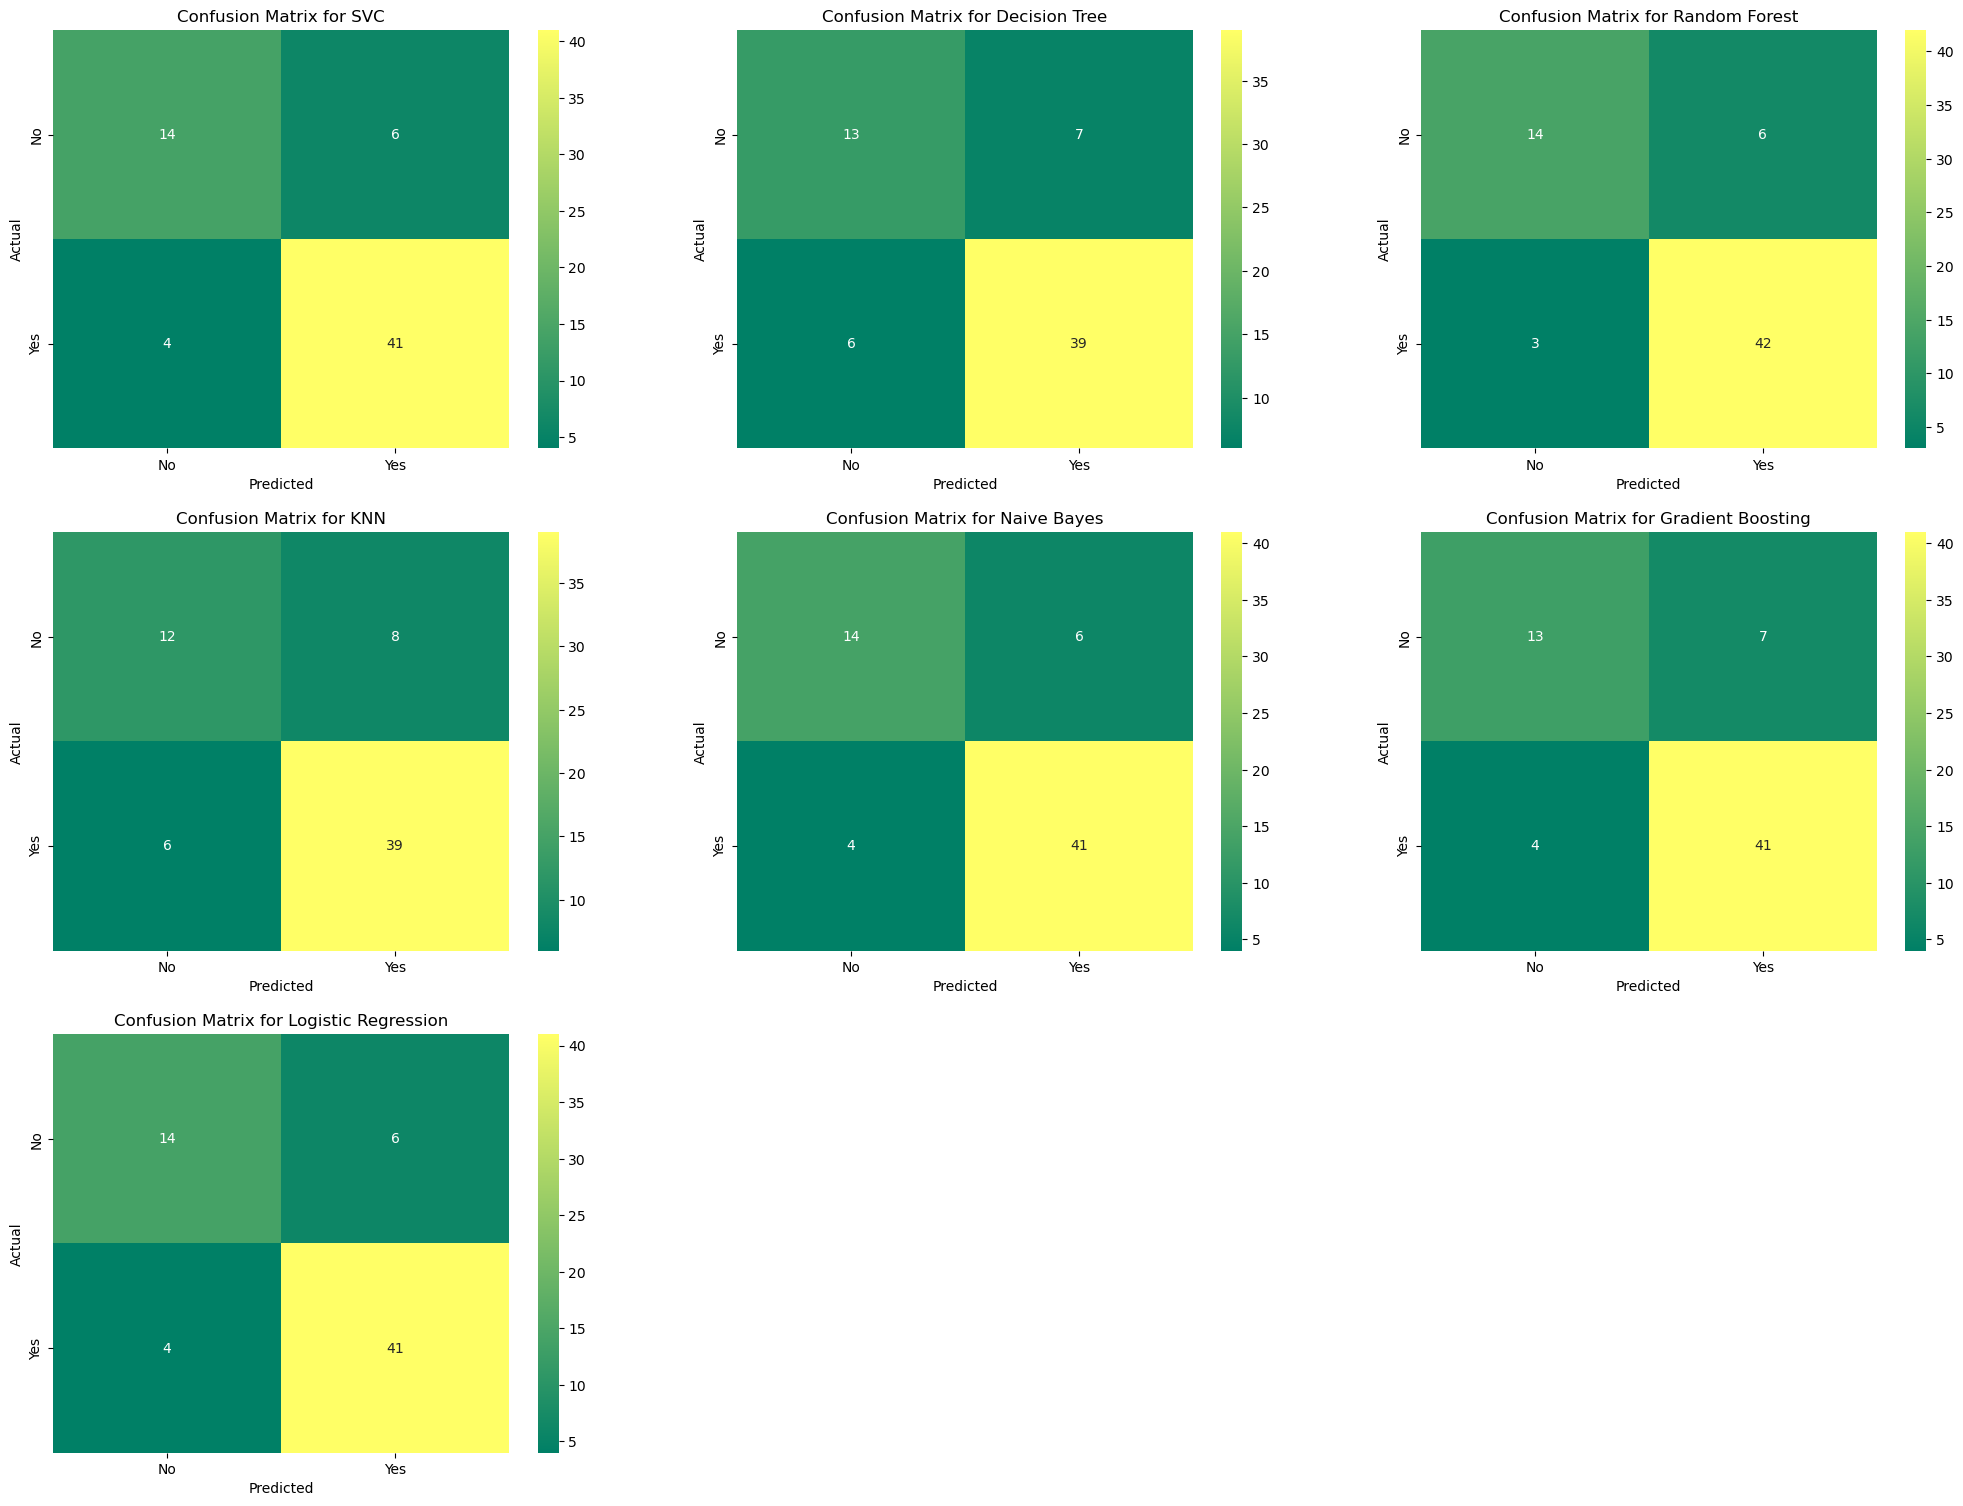

In [100]:
plt.figure(figsize=(25, 25))
for i in range(len(confusions)):
    plt.subplot(4, 3, i+1)
    fig = sns.heatmap(confusions[i], annot=True, fmt='d', cmap='summer')
    plt.title(f'Confusion Matrix for {matrix_label[i]}')
    fig.set_xticklabels(['No', 'Yes'])
    fig.set_yticklabels(['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

from the confusion matrix above the logistic regression model, SVC and Naive Bayes have exactly the same data, this is probably because the data in this dataset is small.

### Model Improvement

In this section, model improvement will be carried out by adding hyperparameter tuning for each model

In [101]:
# Menentukan parameter pada setiap model
# SVC
svc_params = {'classifier__C': [0.1, 1, 2, 3, 4, 5, 10], 
              'classifier__kernel': ['linear', 'rbf', 'poly','sigmoid'],
              'classifier__gamma': ['auto', 'scale']}

# Decision Tree
tree_params = {'classifier__criterion': ['gini', 'entropy'],
               'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 
               'classifier__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
               'classifier__min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
               'classifier__splitter' : ['best','random']}

# Random Forest
rf_params = {'classifier__criterion': ['gini', 'entropy'],
                 'classifier__max_features': ['auto', 'sqrt', 'log2'],
                 'classifier__n_estimators': [100, 150, 200, 250, 300, 350, 400, 500]}

# KNN
knn_params = {'classifier__n_neighbors': [3, 5, 7, 9, 11, 13], 
              'classifier__weights': ['uniform', 'distance'], 
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Naive Bayes
bayes_params = {'classifier__var_smoothing': [2e-9,1e-9, 2e-8, 1e-7, 2e-6, 1e-5, 2e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# eXtreme Gradient Boosting             
gb_params = {'classifier__n_estimators': [50, 100, 200],
             'classifier__max_depth': [2, 4, 6],
             'classifier__min_samples_split': [0.1, 0.2, 0.3],
             'classifier__subsample': [0.5, 0.8, 1.0],
             'classifier__learning_rate': [0.01, 0.001, 0.2]
            }
# Logistic Regression
logistic_params = {'classifier__C': [2, 4, 6, 8, 10], 
                   'classifier__penalty': ['l1', 'l2'],
                   'classifier__solver': ['lbfgs', 'liblinear', 'sag'],
                   'classifier__max_iter': [300, 500, 1000]}

then the model will be tuned using GridSearchCV with 5 cross-validations for all models used

In [102]:
svc = GridSearchCV(svc_pipe, param_grid=svc_params, cv=5, n_jobs=-1)
tree = GridSearchCV(tree_pipe, param_grid=tree_params, cv=5, n_jobs=-1)
rf = GridSearchCV(rf_pipe, param_grid=rf_params, cv=5, n_jobs=-1)
knn = GridSearchCV(knn_pipe, param_grid=knn_params, cv=5, n_jobs=-1)
bayes = GridSearchCV(bayes_pipe, param_grid=bayes_params, cv=5, n_jobs=-1)
gb = GridSearchCV(gb_pipe, param_grid=gb_params, cv=5, n_jobs=-1)
logistic = GridSearchCV(logistic_pipe, param_grid=logistic_params, cv=5, n_jobs=-1)

In [103]:
svc.fit(X_train, y_train)
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
bayes.fit(X_train, y_train)
gb.fit(X_train, y_train)
logistic.fit(X_train, y_train)

/Users/vinodkrishnaselpol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vinodkrishnaselpol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vinodkrishnaselpol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vinodkrishnaselpol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A colu

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('outlier',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     fold=1.5,
                                                                                                     tail='both',
                                                                                                     variables=['hsc_percentage',
                                                                                                                'degree_percentage'])),
                                                                                         ('scaling',
                            

### Model Evaluation (Improvement)

In this section, a model evaluation is carried out to find out which model has good performance to use, the result of the classification report is the result of tuning

In [104]:
print('Training Score:', svc.score(X_train, y_train))
print('Test Score:', svc.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, svc.predict(X_test)))

Training Score: 0.8733333333333333
Test Score: 0.8307692307692308
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.70      0.80      0.74        20
      Placed       0.90      0.84      0.87        45

    accuracy                           0.83        65
   macro avg       0.80      0.82      0.81        65
weighted avg       0.84      0.83      0.83        65



the tuned SVC model has a train score of 0.87 and a test score of 0.83, this model shows good fitting, has an accuracy of 0.83, a recall of 0.82 and a precision of 0.80

In [105]:
print('Training Score:', tree.score(X_train, y_train))
print('Test Score:', tree.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, tree.predict(X_test)))

Training Score: 0.8733333333333333
Test Score: 0.8461538461538461
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.86      0.60      0.71        20
      Placed       0.84      0.96      0.90        45

    accuracy                           0.85        65
   macro avg       0.85      0.78      0.80        65
weighted avg       0.85      0.85      0.84        65



in the tuned Decision Tree model, it has a train score of 0.80 and a test score of 0.80, this model shows good fitting, has an accuracy of 0.80, a recall of 0.72 and a precision of 0.79

In [106]:
print('Training Score:', rf.score(X_train, y_train))
print('Test Score:', rf.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, rf.predict(X_test)))

Training Score: 1.0
Test Score: 0.8153846153846154
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.72      0.65      0.68        20
      Placed       0.85      0.89      0.87        45

    accuracy                           0.82        65
   macro avg       0.79      0.77      0.78        65
weighted avg       0.81      0.82      0.81        65



the Random Forest model has a train score of 1.0 and a test score of 0.84, this model is overfitted, has an accuracy of 0.85, a recall of 0.81 and a precision of 0.83

In [107]:
print('Training Score:', knn.score(X_train, y_train))
print('Test Score:', knn.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, knn.predict(X_test)))

Training Score: 0.9133333333333333
Test Score: 0.7846153846153846
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.67      0.60      0.63        20
      Placed       0.83      0.87      0.85        45

    accuracy                           0.78        65
   macro avg       0.75      0.73      0.74        65
weighted avg       0.78      0.78      0.78        65



/Users/vinodkrishnaselpol/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/vinodkrishnaselpol/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the v

the KNN model has a train score of 0.91 and a test score of 0.78, this model is overfitting, has an accuracy of 0.78, a recall of 0.73 and a precision of 0.75

In [108]:
print('Training Score:', bayes.score(X_train, y_train))
print('Test Score:', bayes.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, bayes.predict(X_test)))

Training Score: 0.8333333333333334
Test Score: 0.8461538461538461
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.86      0.60      0.71        20
      Placed       0.84      0.96      0.90        45

    accuracy                           0.85        65
   macro avg       0.85      0.78      0.80        65
weighted avg       0.85      0.85      0.84        65



the Naive Bayes model has a train score of 0.83 and a test score of 0.884, this model is underfitting, has an accuracy of 0.85, a recall of 0.78 and a precision of 0.85

In [109]:
print('Training Score:', gb.score(X_train, y_train))
print('Test Score:', gb.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, gb.predict(X_test)))

Training Score: 0.9933333333333333
Test Score: 0.8153846153846154
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.75      0.60      0.67        20
      Placed       0.84      0.91      0.87        45

    accuracy                           0.82        65
   macro avg       0.79      0.76      0.77        65
weighted avg       0.81      0.82      0.81        65



the gradient boosting model has a train score of 0.98 and a test score of 0.84, this model is overfitted, has an accuracy of 0.85, a recall of 0.79 and a precision of 0.83

In [110]:
print('Training Score:', logistic.score(X_train, y_train))
print('Test Score:', logistic.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, logistic.predict(X_test)))

Training Score: 0.8666666666666667
Test Score: 0.8461538461538461
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.75      0.75      0.75        20
      Placed       0.89      0.89      0.89        45

    accuracy                           0.85        65
   macro avg       0.82      0.82      0.82        65
weighted avg       0.85      0.85      0.85        65



the Logistic Regression model has a train score of 0.86 and a test score of 0.84 this model shows good fitting, has an accuracy of 0.85, a recall of 0.82 and a precision of 0.82

In [111]:
# Membuat matrix confusion dari setiap model (dengan hyperparameter)
confusions2 = [confusion_matrix(y_test, svc.predict(X_test)),
              confusion_matrix(y_test, tree.predict(X_test)),
              confusion_matrix(y_test, rf.predict(X_test)),
              confusion_matrix(y_test, knn.predict(X_test)),
              confusion_matrix(y_test, bayes.predict(X_test)),
              confusion_matrix(y_test, gb.predict(X_test)),
              confusion_matrix(y_test, logistic.predict(X_test))]

/Users/vinodkrishnaselpol/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


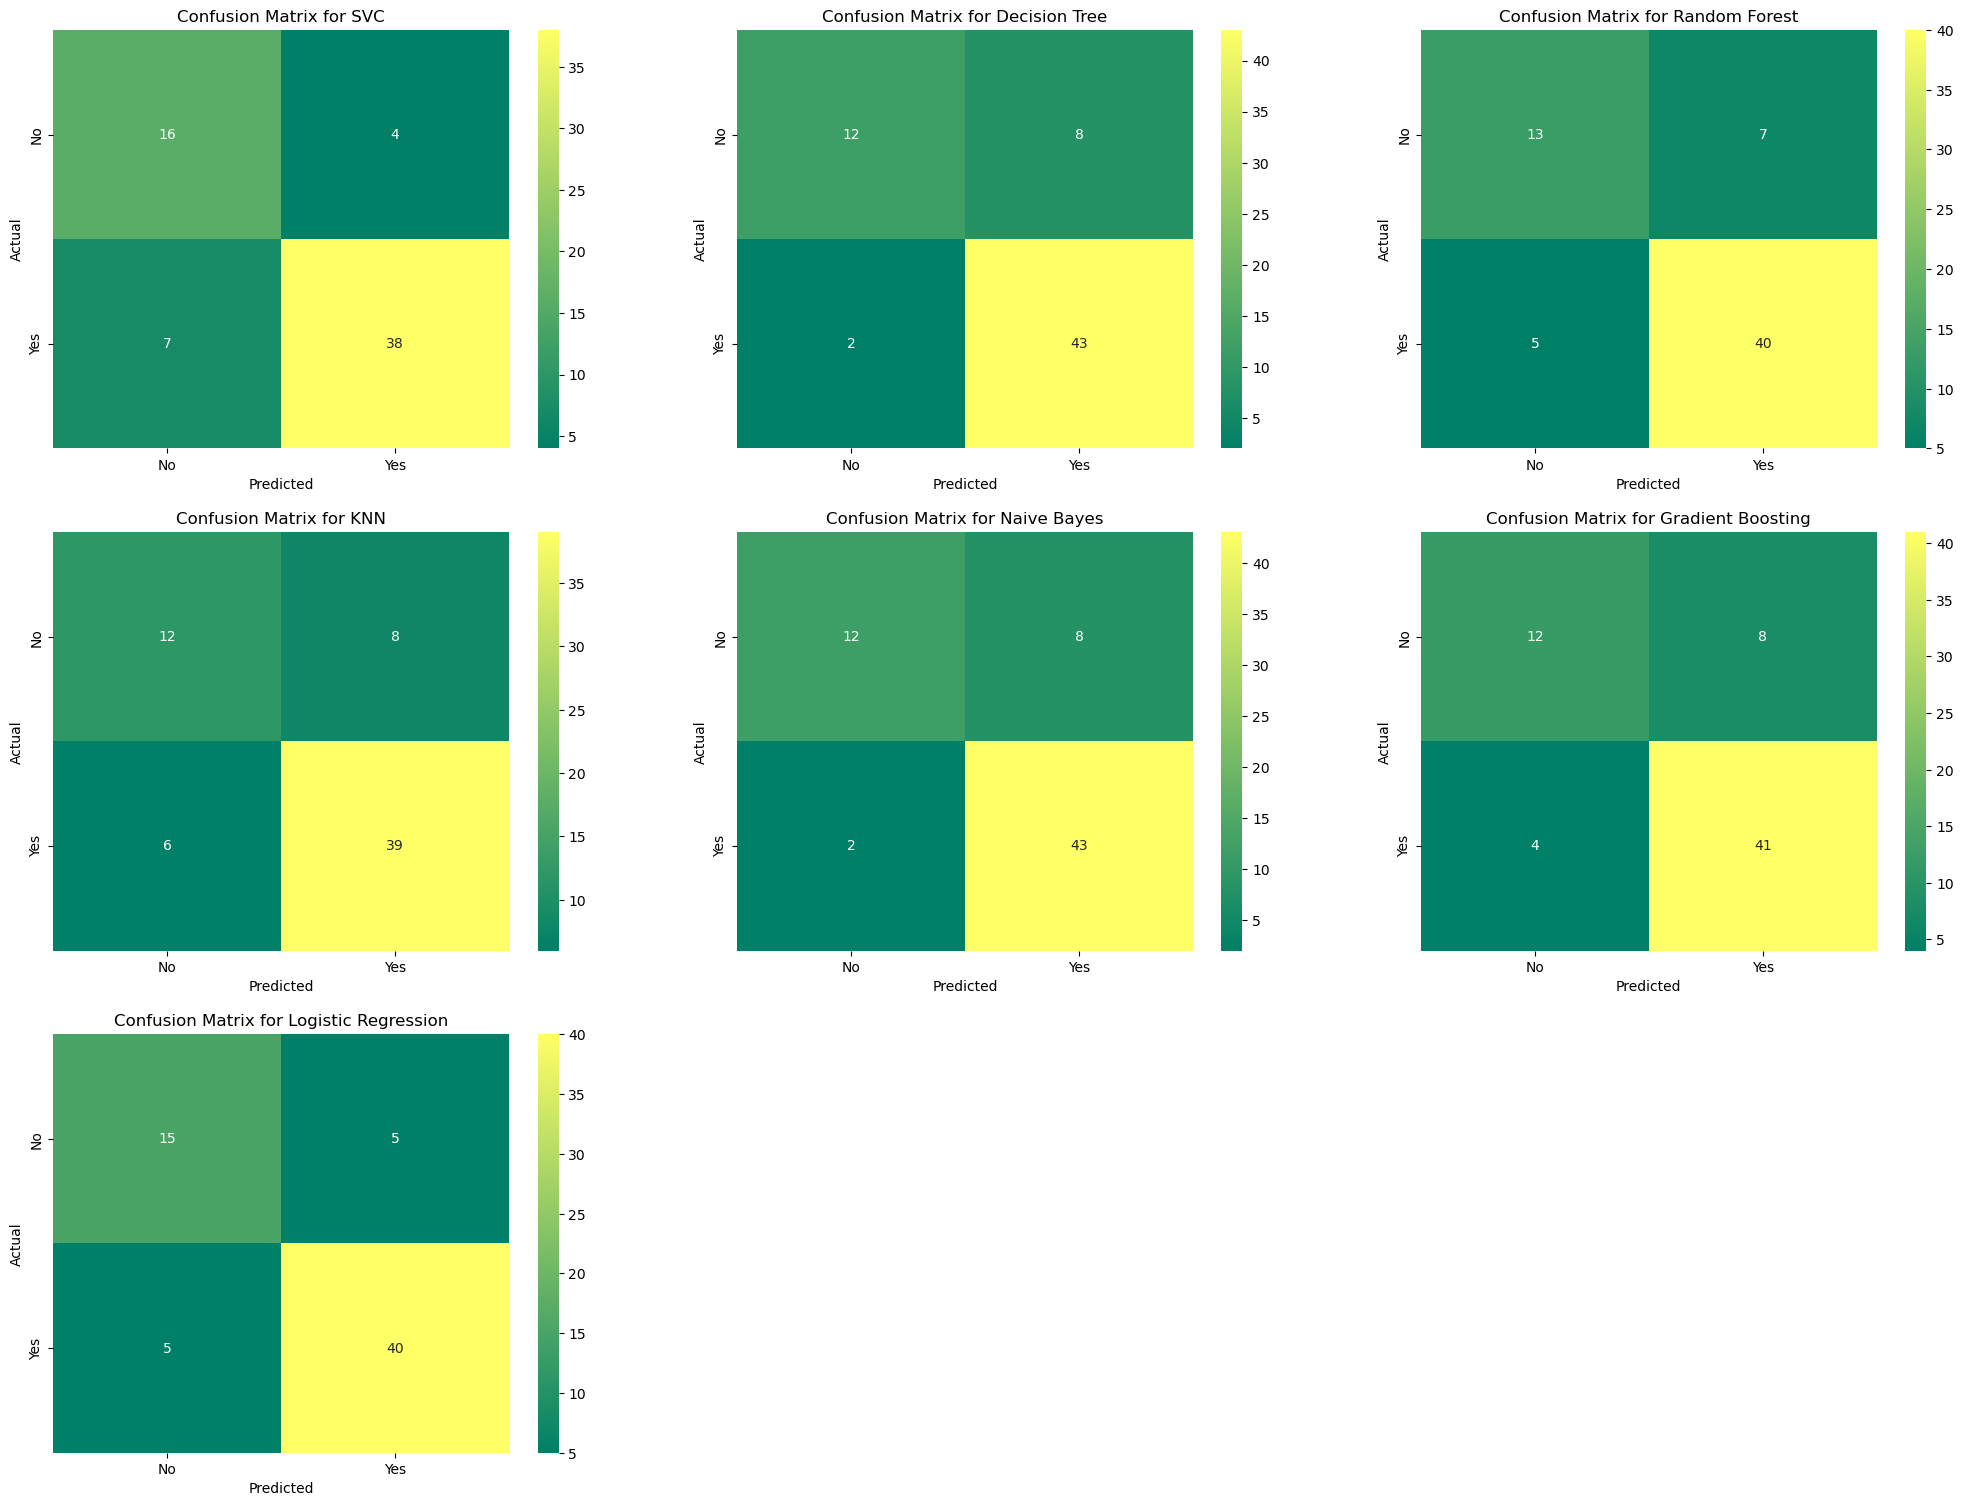

In [112]:
plt.figure(figsize=(25, 25))
for i in range(len(confusions2)):
    plt.subplot(4, 3, i+1)
    fig = sns.heatmap(confusions2[i], annot=True, fmt='d', cmap='summer')
    plt.title(f'Confusion Matrix for {matrix_label[i]}')
    fig.set_xticklabels(['No', 'Yes'])
    fig.set_yticklabels(['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

### Overall Analysis Model Evaluation

From the results of the evaluation between the base model and the improvement model, on the base model, the best performance is in logistic regression with a train score of 0.87 and a test score of 0.84. This model is the only model that shows good fitting, there are 5 models that experience overfitting, namely SVC, Decision Tree, Random Forest, KNN, and gradient boosting, then Naive Bayes experienced underfitting but had very thin train scores and test scores, namely 0.84 and 0.846 where the train score was smaller than the test score, in the improvement model all models were hyperparameter tunning with the result that almost all models experienced performance improvements such as svc and decision tree where the base model shows overfitting scores after tuning to be good fitting, knn and naive bayes do not experience an increase, gradient boosting has increased performance but is still overfitting, and logistic regression is still good fitting but with a difference in train scores and test man thin

## Model Saving

In [113]:
with open('model_logistic.pkl', 'wb') as file_model:
  pickle.dump(logistic, file_model)

## Model Inference

Dilakukan pada notebook terpisah dengan nama file `inference.ipynb`

Deployment : [Job Placement Prediction](https://huggingface.co/spaces/salmanfaishal27/Job-Placement-Prediction)

## Conclusion

The dataset used in this project is the job placement dataset where companies want to recruit but want quality human resources who have good grades and majors that are appropriate to their job position. It can be seen from the EDA that when someone has a high score on `ssc_percentage`, `hsc_percentage`, The `degree_percentage` level of acceptance tends to be high, on the other hand `work_experience` and `specialization` also affect the acceptance rate of applicants, because these factors can make a person accepted for work or not, so these columns are used as features to be trained on machine models learning.

In this case, the company wants applicants who have the best quality, so a classification model is needed that is focused on recall value, because if the company gets applicants whose quality is below the company's standards and whose quality is predicted to be good, the company will experience losses such as late assignments due to employee incompetence, so recall or false negative values ​​should be increased (predictive error values ​​are minimized or eliminated)

then made 7 different models with hyperparameter tuning namely `SVC`, `KNN`, `Naive Bayes`, `Logistic Regression`, `Decision Tree`, `Random Forest`, `Gradient Boosting` where the model with the best performance is `Logistic Regression` with hyperparameters (C = 2, max_iter = 300, penalty = l2, and solver = lbfgs) this model has a train score of 0.87 and a test score of 0.84, an accuracy of 0.85 and an average value of precision and recall 0.82